In [283]:
import numpy as np
import pandas as pd

In [284]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [285]:
data = pd.read_csv('data/input/titanic.csv')

# Как максимально быстро познакомится с данными?

## Нужно узнать:
- Размер датасета?
- Какие есть колонки?
- Типы данных в колонках?
- Пустые значения?
- Дубликаты?
- Прочие ошибки в данных?
- Распределение + минимум, максимум, среднее?
- Математическое ожидание, дисперсия, мода, медиана

###  Размер датасета

In [286]:
data.shape

(1309, 28)

###  Список колонок

In [287]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [288]:
data = data.drop([col for col in data.columns if 'zero' in col], axis=1) # интересно, зачем нужны были эти колонки с нулями?

### Типы данных в колонках

In [289]:
data.dtypes

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
Parch            int64
Pclass           int64
Embarked       float64
2urvived         int64
dtype: object

#### Как изменить тип данных с string на datetime

### Пустые значения

In [290]:
data.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [291]:
data = data.fillna(0)

### Дубликаты

In [292]:
data.duplicated().sum()

0

###### А дубликатов и нет. Но если вдруг - их можно убрать с помощью метода drop_duplicates()

### Ошибки - обычно что-то не так с колонками с типом данных "object" (значит там есть данные различных типов, что странно). В нашем случае я вижу ошибку в названии колонки 2urvived

In [293]:
data = data.rename(columns={'2urvived': 'survived'})

## Распределение - Минимум, максимум, среднее

### Использовать метод describe(). Или можно использовать метожы пакета NumPy - min, max, mean

In [294]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.490451,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.816089,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


###### 25%, 50%, 75% - это же вроде квантили. Тоесть, например для "Age" 50% значений меньше числа 28. А это разве не тоже самое, что и медиана?

## Распределение - математическое ожидание, дисперсия, мода, медиана

### Насколько я помню мат. ожидание - это тоже самое, что и expected value, mean и average. 

In [295]:
statistics = data.describe().T
statistics

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Embarked,1309.0,1.490451,0.816089,0.00,1.0000,2.0000,2.000,2.0000
survived,1309.0,0.261268,0.439494,0.00,0.0000,0.0000,1.000,1.0000


#### mean у нас уже есть

### Можем добавить дисперсию и медиану с помощью методов var() и median() соответственно.

In [296]:
for func in [np.var, np.median]:
    statistics[func.__name__] = [func(data[col]) for col in data.columns]

In [297]:
statistics

,count,mean,std,min,25%,50%,75%,max,var,median
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000,142790.000000,655.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000,166.418004,28.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292,2675.137586,14.4542
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000,0.229263,0.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000,1.084223,0.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000,0.748622,0.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000,0.701433,3.0000
Embarked,1309.0,1.490451,0.816089,0.00,1.0000,2.0000,2.000,2.0000,0.665493,2.0000
survived,1309.0,0.261268,0.439494,0.00,0.0000,0.0000,1.000,1.0000,0.193007,0.0000


### Моду придется добавить отдельно

In [298]:
from scipy import stats

statistics['mode'] = [stats.mode(data[col])[0][0] for col in data.columns]

In [299]:
statistics = np.round(statistics, 2) # округляем метрики до второго знака
statistics

,count,mean,std,min,25%,50%,75%,max,var,median,mode
Passengerid,1309.0,655.00,378.02,1.00,328.0,655.00,982.00,1309.00,142790.00,655.00,1.00
Age,1309.0,29.50,12.91,0.17,22.0,28.00,35.00,80.00,166.42,28.00,28.00
Fare,1309.0,33.28,51.74,0.00,7.9,14.45,31.28,512.33,2675.14,14.45,8.05
Sex,1309.0,0.36,0.48,0.00,0.0,0.00,1.00,1.00,0.23,0.00,0.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00,1.08,0.00,0.00
Parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00,0.75,0.00,0.00
Pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00,0.70,3.00,3.00
Embarked,1309.0,1.49,0.82,0.00,1.0,2.00,2.00,2.00,0.67,2.00,2.00
survived,1309.0,0.26,0.44,0.00,0.0,0.00,1.00,1.00,0.19,0.00,0.00


## Построение графиков

### И что это за распределение?
https://habr.com/ru/post/331060/ - типичные распределения вероятности: шпаргалка data scientist-а

##### По форме напоминатет Биноминальное

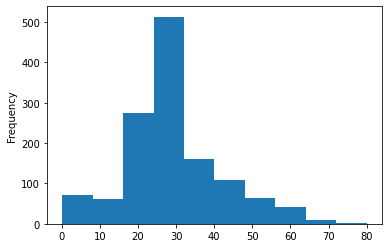

In [300]:
data['Age'].plot.hist();

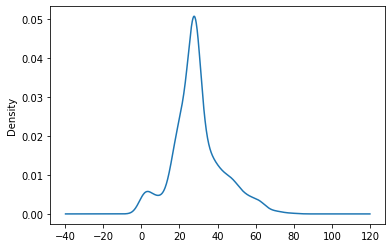

In [301]:
data['Age'].plot.density();

##### А это точно Бернулли

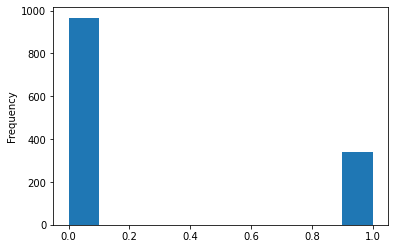

In [302]:
data['survived'].plot.hist();

### Таким способом можно последовательно нарисовать графики для каждой из колонок, а как вывести и все за раз?

##### Цикл работает, но графики накладываются друг на друга

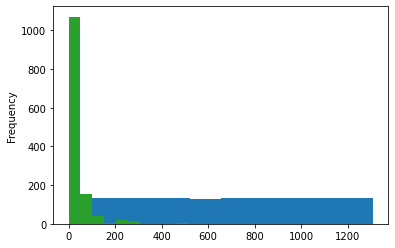

In [303]:
for col in data.columns:
    data[col].plot.hist()

##### Чтобы избежать этого, нужно в цикле создавать новый объект класса figure

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

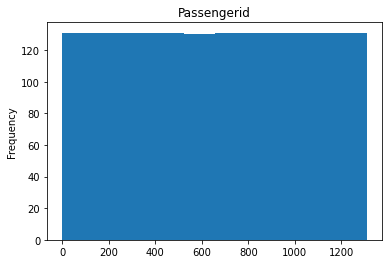

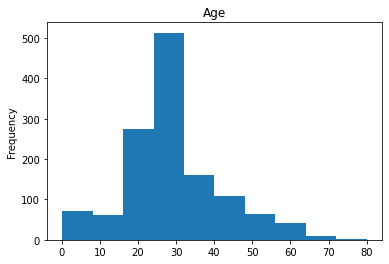

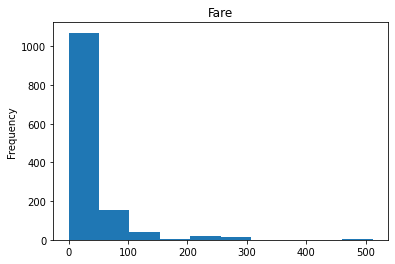

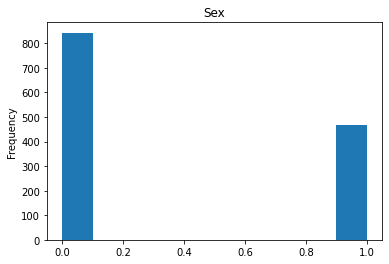

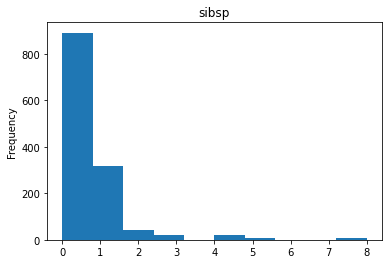

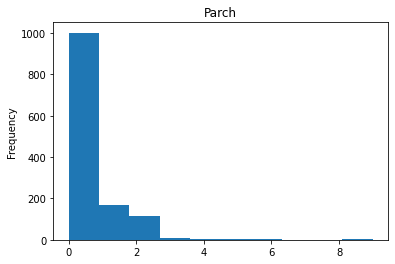

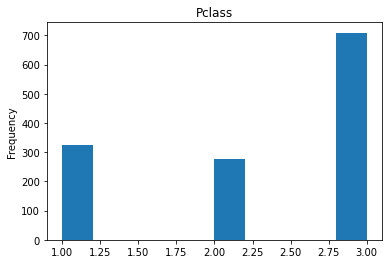

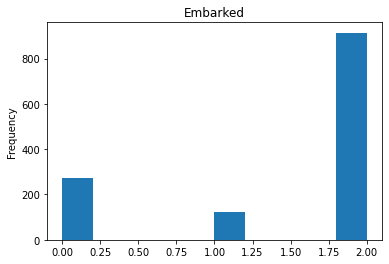

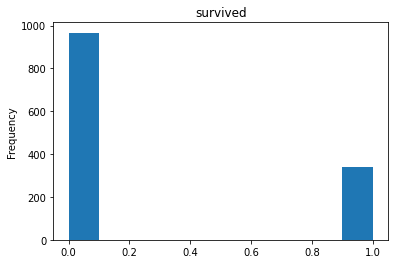

In [305]:
for col in data.columns:
    plt.figure()
    data[col].plot.hist()
    plt.title(col)

### А как сделать тоже самое, но с помощью пакета Plotly?

### Можно ли записать графики в таблицу? Отдельной колонкой, рядом с остальными статистиками?

In [306]:
from sparklines import sparklines

def sparkline_dist(data):
    hist = np.histogram(data)[0]
    dist_strings = ''.join(sparklines(hist))
    return dist_strings

In [307]:
statistics['histogram'] = [sparkline_dist(data[col]) for col in data.columns]
statistics

,count,mean,std,min,25%,50%,75%,max,var,median,mode,histogram
Passengerid,1309.0,655.00,378.02,1.00,328.0,655.00,982.00,1309.00,142790.00,655.00,1.00,████▁█████
Age,1309.0,29.50,12.91,0.17,22.0,28.00,35.00,80.00,166.42,28.00,28.00,▂▂▅█▃▂▂▂▁▁
Fare,1309.0,33.28,51.74,0.00,7.9,14.45,31.28,512.33,2675.14,14.45,8.05,█▂▁▁▁▁▁▁▁▁
Sex,1309.0,0.36,0.48,0.00,0.0,0.00,1.00,1.00,0.23,0.00,0.00,█▁▁▁▁▁▁▁▁▅
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00,1.08,0.00,0.00,█▄▁▁▁▁▁▁▁▁
Parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00,0.75,0.00,0.00,█▂▂▁▁▁▁▁▁▁
Pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00,0.70,3.00,3.00,▄▁▁▁▁▄▁▁▁█
Embarked,1309.0,1.49,0.82,0.00,1.0,2.00,2.00,2.00,0.67,2.00,2.00,▃▁▁▁▁▂▁▁▁█
survived,1309.0,0.26,0.44,0.00,0.0,0.00,1.00,1.00,0.19,0.00,0.00,█▁▁▁▁▁▁▁▁▃


##### А симпатично получилось

### Наверняка есть пакеты, проводящие все эти действия за одну команду. Но это уже в следующий раз